In [39]:
import sqlite3

conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS sales")

cursor.execute('''
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    order_id TEXT,
    date TEXT,
    category TEXT,
    product TEXT,
    region TEXT,
    quantity INTEGER,
    price REAL
)
''')

sales_data = [
    ('ORD1001', '2023-01-10', 'Electronics', 'Laptop', 'North', 2, 750.00),
    ('ORD1002', '2023-01-11', 'Furniture', 'Office Chair', 'West', 4, 120.00),
    ('ORD1003', '2023-01-12', 'Office Supplies', 'Stapler', 'South', 10, 5.50),
    ('ORD1004', '2023-01-15', 'Electronics', 'Monitor', 'East', 3, 180.00),
    ('ORD1005', '2023-01-16', 'Furniture', 'Bookshelf', 'North', 1, 200.00),
    ('ORD1006', '2023-01-17', 'Office Supplies', 'Paper Pack', 'West', 6, 12.00),
    ('ORD1007', '2023-01-20', 'Electronics', 'Keyboard', 'South', 5, 25.00),
    ('ORD1008', '2023-01-21', 'Furniture', 'Table', 'East', 2, 250.00),
    ('ORD1009', '2023-01-22', 'Office Supplies', 'Pens Set', 'North', 8, 8.00),
    ('ORD1010', '2023-01-23', 'Electronics', 'Mouse', 'West', 7, 18.00),
    ('ORD1011', '2023-01-25', 'Furniture', 'Couch', 'South', 1, 500.00),
    ('ORD1012', '2023-01-27', 'Office Supplies', 'Notebook', 'East', 15, 3.00),
    ('ORD1013', '2023-01-28', 'Electronics', 'Tablet', 'North', 2, 300.00),
    ('ORD1014', '2023-01-30', 'Furniture', 'Cabinet', 'West', 3, 180.00),
    ('ORD1015', '2023-02-01', 'Office Supplies', 'Highlighters', 'South', 12, 4.50),
    ('ORD1016', '2023-02-02', 'Electronics', 'Smartphone', 'East', 2, 600.00),
    ('ORD1017', '2023-02-03', 'Furniture', 'Desk', 'North', 2, 220.00),
    ('ORD1018', '2023-02-04', 'Office Supplies', 'File Folders', 'West', 20, 2.00),
    ('ORD1019', '2023-02-05', 'Electronics', 'Speaker', 'South', 3, 90.00),
    ('ORD1020', '2023-02-06', 'Furniture', 'Armchair', 'East', 1, 350.00)
]

cursor.executemany('''
INSERT INTO sales (order_id, date, category, product, region, quantity, price)
VALUES (?, ?, ?, ?, ?, ?, ?)
''', sales_data)

conn.commit()
conn.close()

print("sales_data.db created with 20 rows.")
sales_data

sales_data.db created with 20 rows.


[('ORD1001', '2023-01-10', 'Electronics', 'Laptop', 'North', 2, 750.0),
 ('ORD1002', '2023-01-11', 'Furniture', 'Office Chair', 'West', 4, 120.0),
 ('ORD1003', '2023-01-12', 'Office Supplies', 'Stapler', 'South', 10, 5.5),
 ('ORD1004', '2023-01-15', 'Electronics', 'Monitor', 'East', 3, 180.0),
 ('ORD1005', '2023-01-16', 'Furniture', 'Bookshelf', 'North', 1, 200.0),
 ('ORD1006', '2023-01-17', 'Office Supplies', 'Paper Pack', 'West', 6, 12.0),
 ('ORD1007', '2023-01-20', 'Electronics', 'Keyboard', 'South', 5, 25.0),
 ('ORD1008', '2023-01-21', 'Furniture', 'Table', 'East', 2, 250.0),
 ('ORD1009', '2023-01-22', 'Office Supplies', 'Pens Set', 'North', 8, 8.0),
 ('ORD1010', '2023-01-23', 'Electronics', 'Mouse', 'West', 7, 18.0),
 ('ORD1011', '2023-01-25', 'Furniture', 'Couch', 'South', 1, 500.0),
 ('ORD1012', '2023-01-27', 'Office Supplies', 'Notebook', 'East', 15, 3.0),
 ('ORD1013', '2023-01-28', 'Electronics', 'Tablet', 'North', 2, 300.0),
 ('ORD1014', '2023-01-30', 'Furniture', 'Cabinet', 

In [44]:
import pandas as pd

conn = sqlite3.connect("sales_data.db")

query = """
SELECT product,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
conn.close()
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
product,Armchair,Bookshelf,Cabinet,Couch,Desk,File Folders,Highlighters,Keyboard,Laptop,Monitor,Mouse,Notebook,Office Chair,Paper Pack,Pens Set,Smartphone,Speaker,Stapler,Table,Tablet
revenue,350.0,200.0,540.0,500.0,440.0,40.0,54.0,125.0,1500.0,540.0,126.0,45.0,480.0,72.0,64.0,1200.0,270.0,55.0,500.0,600.0


In [41]:
conn = sqlite3.connect('sales_data.db')

query = """
SELECT *
FROM sales
WHERE category = 'Electronics'
"""

df = pd.read_sql_query(query, conn)
conn.close()
df

,id,order_id,date,category,product,region,quantity,price
0,1,ORD1001,2023-01-10,Electronics,Laptop,North,2,750.0
1,4,ORD1004,2023-01-15,Electronics,Monitor,East,3,180.0
2,7,ORD1007,2023-01-20,Electronics,Keyboard,South,5,25.0
3,10,ORD1010,2023-01-23,Electronics,Mouse,West,7,18.0
4,13,ORD1013,2023-01-28,Electronics,Tablet,North,2,300.0
5,16,ORD1016,2023-02-02,Electronics,Smartphone,East,2,600.0
6,19,ORD1019,2023-02-05,Electronics,Speaker,South,3,90.0


In [42]:
conn = sqlite3.connect('sales_data.db')

query = """
SELECT *
FROM sales
WHERE category = 'Office Supplies'
"""
df = pd.read_sql_query(query, conn)
conn.close()
df

,id,order_id,date,category,product,region,quantity,price
0,3,ORD1003,2023-01-12,Office Supplies,Stapler,South,10,5.5
1,6,ORD1006,2023-01-17,Office Supplies,Paper Pack,West,6,12.0
2,9,ORD1009,2023-01-22,Office Supplies,Pens Set,North,8,8.0
3,12,ORD1012,2023-01-27,Office Supplies,Notebook,East,15,3.0
4,15,ORD1015,2023-02-01,Office Supplies,Highlighters,South,12,4.5
5,18,ORD1018,2023-02-04,Office Supplies,File Folders,West,20,2.0


In [29]:
conn = sqlite3.connect('sales_data.db')

query = """
SELECT *
FROM sales
WHERE category = 'Furniture'
"""
df = pd.read_sql_query(query, conn)
conn.close()
df

,id,order_id,date,category,product,region,quantity,price
0,2,ORD1002,2023-01-11,Furniture,Office Chair,West,4,120.0
1,5,ORD1005,2023-01-16,Furniture,Bookshelf,North,1,200.0
2,8,ORD1008,2023-01-21,Furniture,Table,East,2,250.0
3,11,ORD1011,2023-01-25,Furniture,Couch,South,1,500.0
4,14,ORD1014,2023-01-30,Furniture,Cabinet,West,3,180.0
5,17,ORD1017,2023-02-03,Furniture,Desk,North,2,220.0
6,20,ORD1020,2023-02-06,Furniture,Armchair,East,1,350.0


In [30]:
conn = sqlite3.connect('sales_data.db')

query = """
SELECT category, product, quantity
FROM sales
GROUP BY product, quantity
ORDER BY quantity DESC
LIMIT 10
"""
df = pd.read_sql_query(query, conn)
conn.close()
df.T

,0,1,2,3,4,5,6,7,8,9
category,Office Supplies,Office Supplies,Office Supplies,Office Supplies,Office Supplies,Electronics,Office Supplies,Electronics,Furniture,Furniture
product,File Folders,Notebook,Highlighters,Stapler,Pens Set,Mouse,Paper Pack,Keyboard,Office Chair,Cabinet
quantity,20,15,12,10,8,7,6,5,4,3


In [31]:
conn = sqlite3.connect('sales_data.db')

query = """
SELECT category, product, price
FROM sales
GROUP BY product, price
ORDER BY price DESC
LIMIT 10
"""
df = pd.read_sql_query(query, conn)
conn.close()
df.T

,0,1,2,3,4,5,6,7,8,9
category,Electronics,Electronics,Furniture,Furniture,Electronics,Furniture,Furniture,Furniture,Furniture,Electronics
product,Laptop,Smartphone,Couch,Armchair,Tablet,Table,Desk,Bookshelf,Cabinet,Monitor
price,750.0,600.0,500.0,350.0,300.0,250.0,220.0,200.0,180.0,180.0


Index(['product', 'total_revenue'], dtype='object')


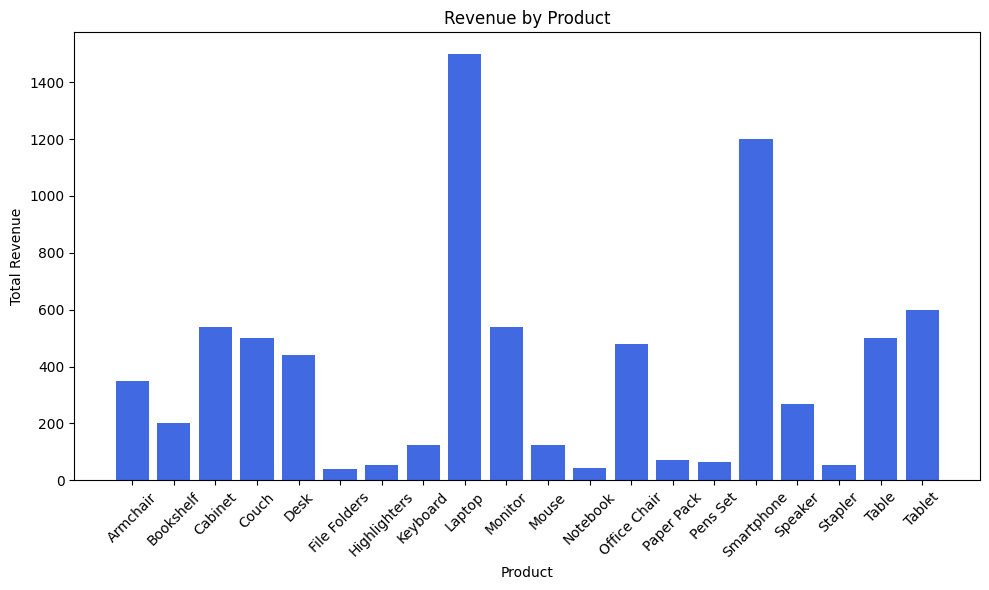

In [46]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('sales_data.db')

query = """
SELECT product, SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
conn.close()

print(df.columns)

plt.figure(figsize=(10, 6))
plt.bar(df['product'], df['total_revenue'], color='royalblue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('Revenue by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
plt.savefig('sales_chart.png')

<Figure size 640x480 with 0 Axes>